In [11]:
import numpy as np
import matplotlib.pyplot as plt

def plot_embed(Y, labels, title, figsize=(8, 8)):
    plt.figure(figsize=figsize)
    plt.title(title)
    plt.scatter(Y[:, 0], Y[:, 1], 5, labels)

import trimap
from importlib import reload
reload(trimap)
from trimap import Wrapper as TriMap

X = np.loadtxt('data/mnist2500_X.txt')
labels = np.loadtxt('data/mnist2500_labels.txt')
plt.rcParams['image.cmap'] = 'tab10'

In [20]:
X = np.outer(np.random.uniform(size=500), np.random.randn(30))
# X = np.outer(np.arange(500), np.random.randn(30))
trimap = TriMap(X, input_dim=None)
trimap.generate_triplets(verbose=True)
Y = trimap.embed(num_iters=1000, verbose=True)

Generated triplets 500 / 500
Generated random triplets 500 / 500
2
Iteration:  100, Loss: 537.345, Violated triplets: 0.0156
Iteration:  200, Loss: 384.271, Violated triplets: 0.0133
Iteration:  300, Loss: 207.603, Violated triplets: 0.0062
Iteration:  400, Loss: 160.183, Violated triplets: 0.0054
Iteration:  500, Loss: 143.624, Violated triplets: 0.0052
Iteration:  600, Loss: 135.675, Violated triplets: 0.0052
Iteration:  700, Loss: 130.869, Violated triplets: 0.0052
Iteration:  800, Loss: 127.648, Violated triplets: 0.0052
Iteration:  900, Loss: 125.240, Violated triplets: 0.0052
Iteration: 1000, Loss: 123.242, Violated triplets: 0.0052


In [82]:
X = np.zeros([1000, 50])
direction = np.random.randn(50)
for i in range(1000):
    shift = direction * i * 0.01
    X[i, :] = np.random.randn(50) + shift

In [89]:
X = np.outer(np.arange(500), direction)

In [60]:
X.shape

(1, 50)

In [93]:
trimap = TriMap(X, input_dim=None)
trimap.generate_triplets(verbose=True)
Y = trimap.embed(num_iters=1000, optimizer='sgd-momentum', verbose=True)

Generated triplets 500 / 500
Generated random triplets 500 / 500
2
Iteration:  100, Loss: 1028.732, Violated triplets: 0.0405
Iteration:  200, Loss: 500.576, Violated triplets: 0.0165
Iteration:  300, Loss: 272.765, Violated triplets: 0.0081
Iteration:  400, Loss: 151.244, Violated triplets: 0.0056
Iteration:  500, Loss: 116.748, Violated triplets: 0.0054
Iteration:  600, Loss: 104.190, Violated triplets: 0.0054
Iteration:  700, Loss: 99.566, Violated triplets: 0.0054
Iteration:  800, Loss: 98.240, Violated triplets: 0.0054
Iteration:  900, Loss: 97.055, Violated triplets: 0.0054
Iteration: 1000, Loss: 96.668, Violated triplets: 0.0054


In [91]:
Y.shape

(500, 2)

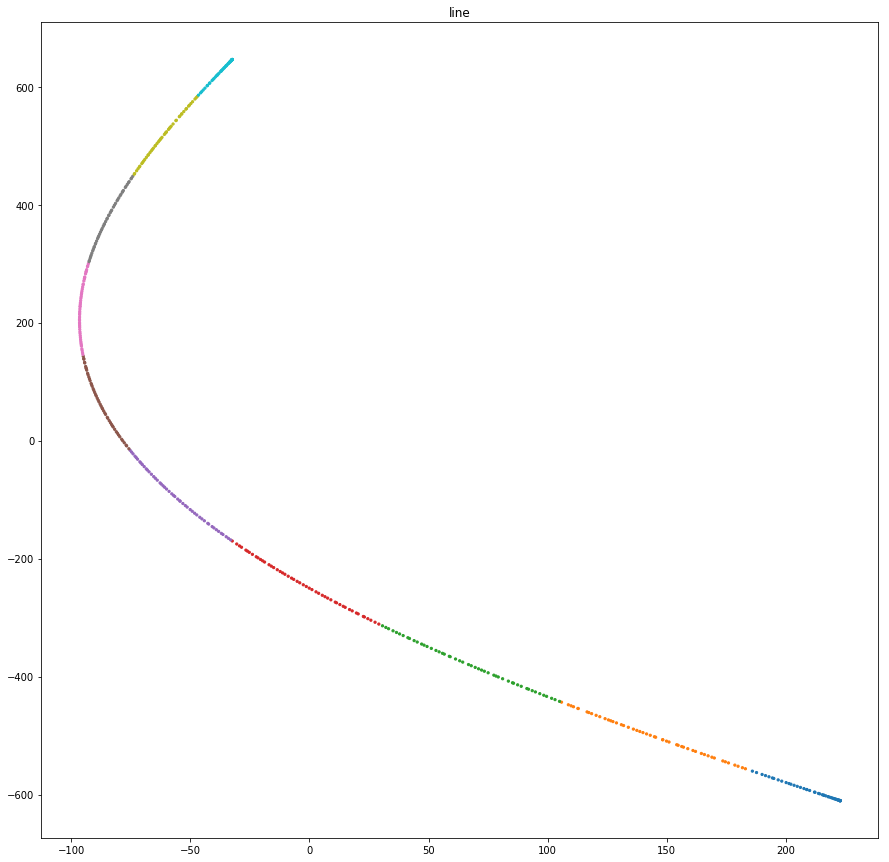

In [94]:
plot_embed(Y, np.arange(500)/50, 'line', figsize=(15, 15))
plt.show()

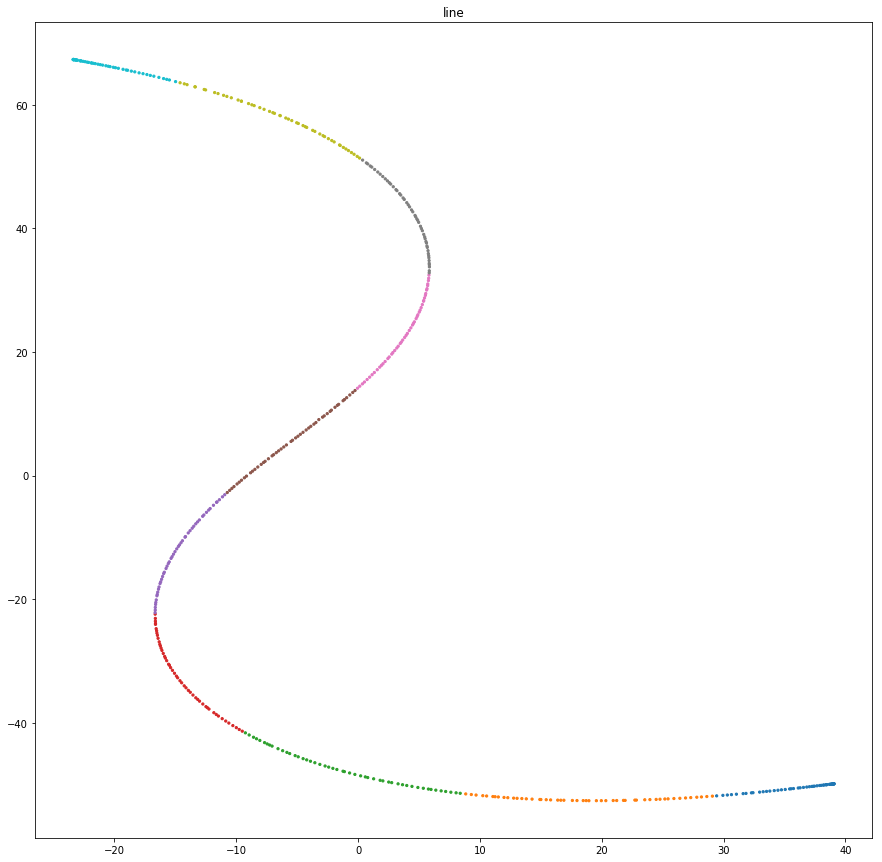

In [92]:
plot_embed(Y, np.arange(500)/50, 'line', figsize=(15, 15))
plt.show()

In [66]:
from sklearn.manifold import TSNE
Y = TSNE(n_components=2, verbose=True).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.001s...
[t-SNE] Computed neighbors for 500 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 0.033394
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.482655
[t-SNE] Error after 1000 iterations: 0.153238


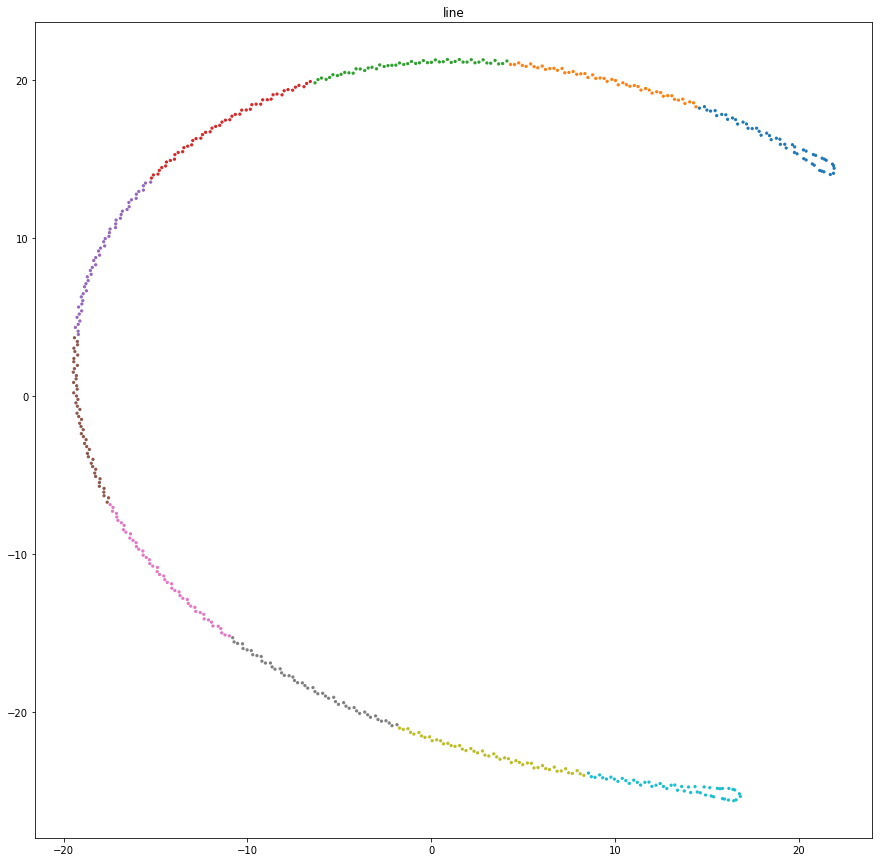

In [24]:
plot_embed(Y, np.arange(500) / 50, 'line', figsize=(15, 15))
plt.show()

In [2]:
shift = np.abs(np.random.randn(784))
X_triple1 = X.copy()
X_triple2 = X.copy() + shift
X_triple3 = X.copy() + 2 * shift
X_triple = np.concatenate([X_triple1, X_triple2, X_triple3])
X_line = np.outer(np.random.uniform(size=500), X_triple3[487] - X_triple1[487]) + X_triple1[487]
X_triple = np.concatenate([X_triple1, X_triple2, X_triple3, X_line])
labels_triple = np.concatenate([labels, labels, labels, 500*[10]])

In [16]:
trimap = TriMap(X_triple)
trimap.generate_triplets(verbose=True)
trimap.save_triplets('models/mnist2500_triplet.pkl')

Generated triplets 500 / 8000
Generated triplets 1000 / 8000
Generated triplets 1500 / 8000
Generated triplets 2000 / 8000
Generated triplets 2500 / 8000
Generated triplets 3000 / 8000
Generated triplets 3500 / 8000
Generated triplets 4000 / 8000
Generated triplets 4500 / 8000
Generated triplets 5000 / 8000
Generated triplets 5500 / 8000
Generated triplets 6000 / 8000
Generated triplets 6500 / 8000
Generated triplets 7000 / 8000
Generated triplets 7500 / 8000
Generated triplets 8000 / 8000
Generated random triplets 500 / 8000
Generated random triplets 1000 / 8000
Generated random triplets 1500 / 8000
Generated random triplets 2000 / 8000
Generated random triplets 2500 / 8000
Generated random triplets 3000 / 8000
Generated random triplets 3500 / 8000
Generated random triplets 4000 / 8000
Generated random triplets 4500 / 8000
Generated random triplets 5000 / 8000
Generated random triplets 5500 / 8000
Generated random triplets 6000 / 8000
Generated random triplets 6500 / 8000
Generated ra

In [20]:
import pickle
with open('models/mnist2500_triplet.pkl', 'rb') as f:
    triplets, weights = pickle.load(f)
triplets.dtype

dtype('float64')

In [3]:
Y = {}
for t in [1.5, 2, 3, 5, 10]:
    trimap = TriMap(X_triple, t=t)
    trimap.load_triplets('models/mnist2500_triplet.pkl')
    Y[t] = trimap.embed(num_iters=750, verbose=True)

1.5
Iteration:  100, Loss: 1599.545, Violated triplets: 0.0402
Iteration:  200, Loss: 977.104, Violated triplets: 0.0329
Iteration:  300, Loss: 817.127, Violated triplets: 0.0307
Iteration:  400, Loss: 721.285, Violated triplets: 0.0288
Iteration:  500, Loss: 560.891, Violated triplets: 0.0275
Iteration:  600, Loss: 361.071, Violated triplets: 0.0255
Iteration:  700, Loss: 280.013, Violated triplets: 0.0246
2
Iteration:  100, Loss: 2590.050, Violated triplets: 0.0418
Iteration:  200, Loss: 1264.582, Violated triplets: 0.0312
Iteration:  300, Loss: 799.975, Violated triplets: 0.0269
Iteration:  400, Loss: 555.415, Violated triplets: 0.0252
Iteration:  500, Loss: 509.066, Violated triplets: 0.0244
Iteration:  600, Loss: 481.164, Violated triplets: 0.0240
Iteration:  700, Loss: 459.840, Violated triplets: 0.0238
3
Iteration:  100, Loss: 5799.306, Violated triplets: 0.0517
Iteration:  200, Loss: 3236.706, Violated triplets: 0.0382
Iteration:  300, Loss: 2638.849, Violated triplets: 0.0355


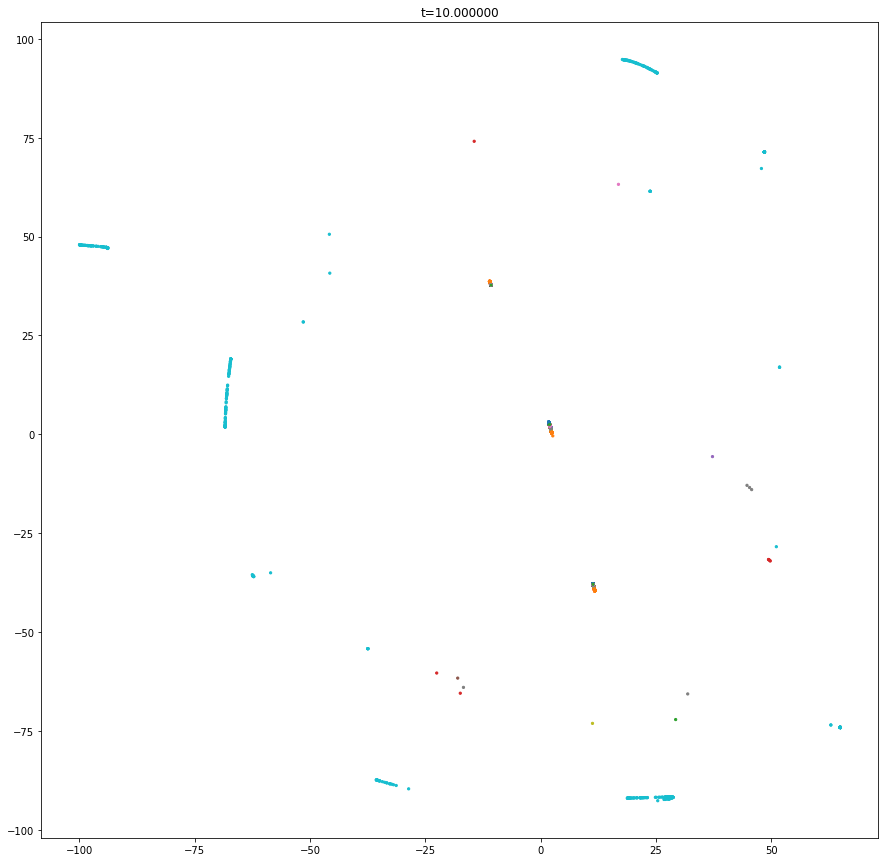

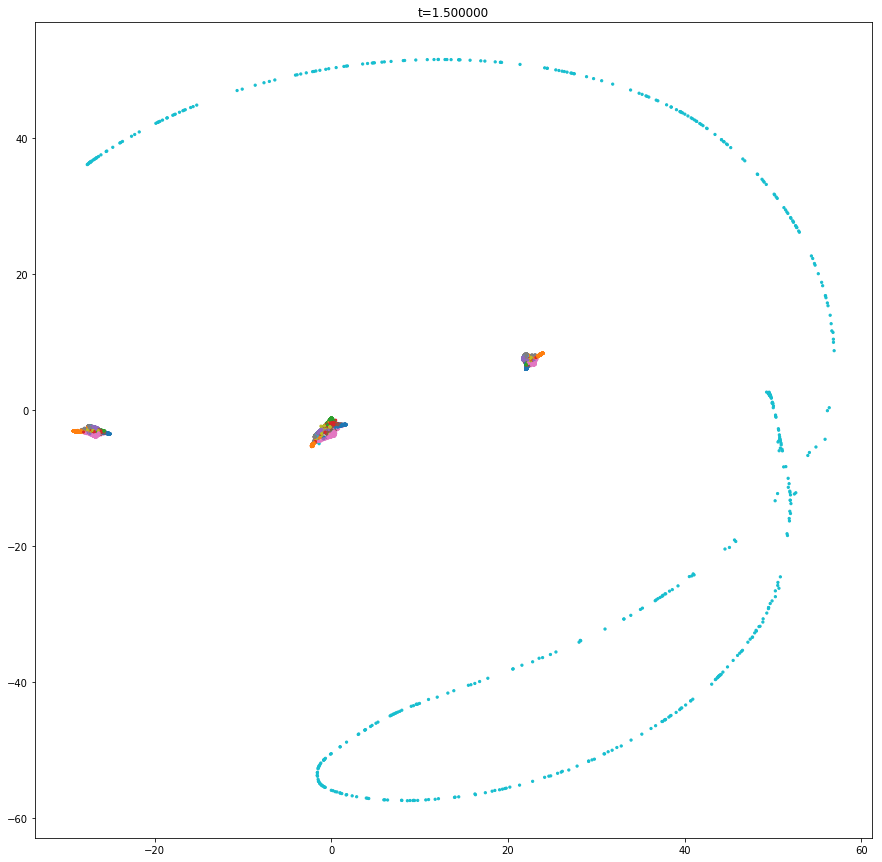

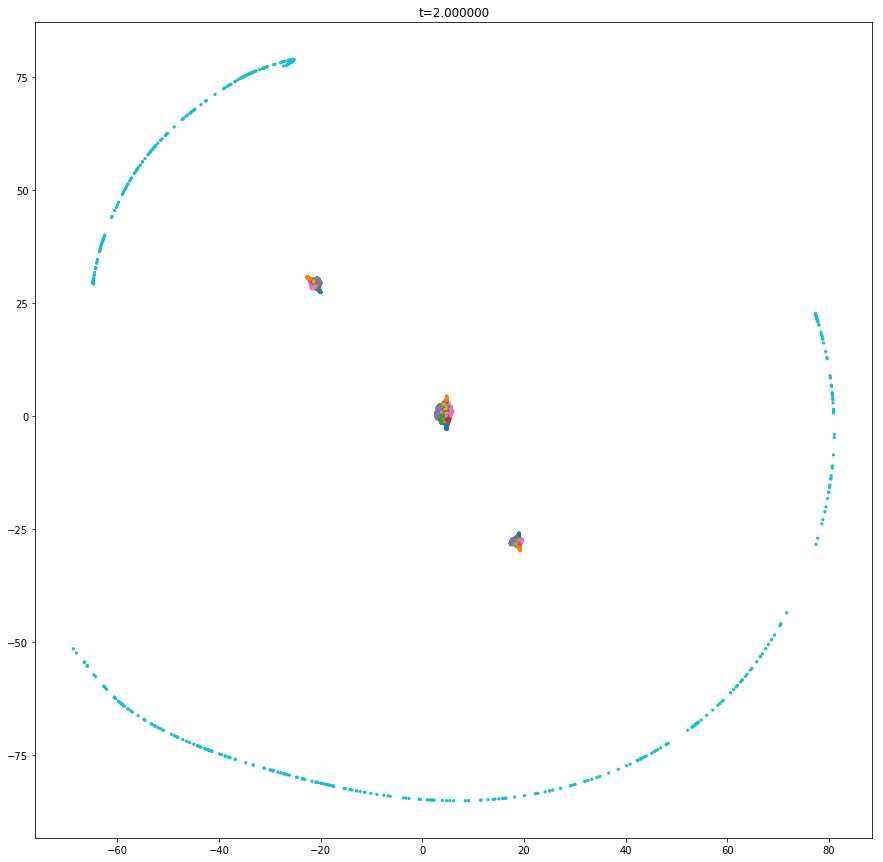

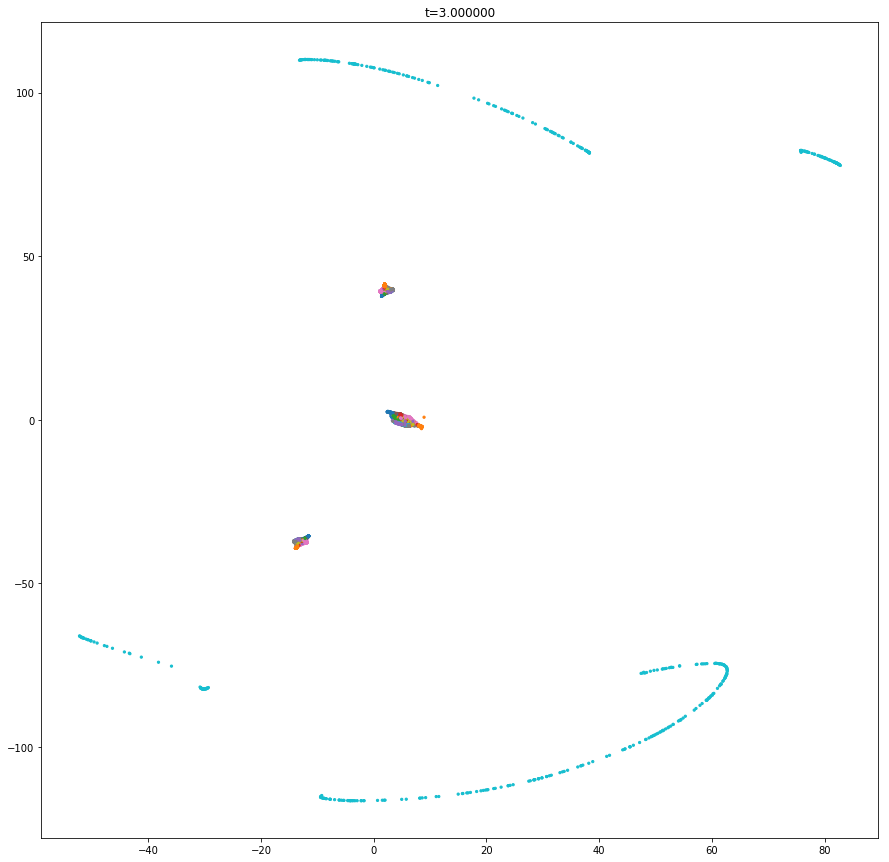

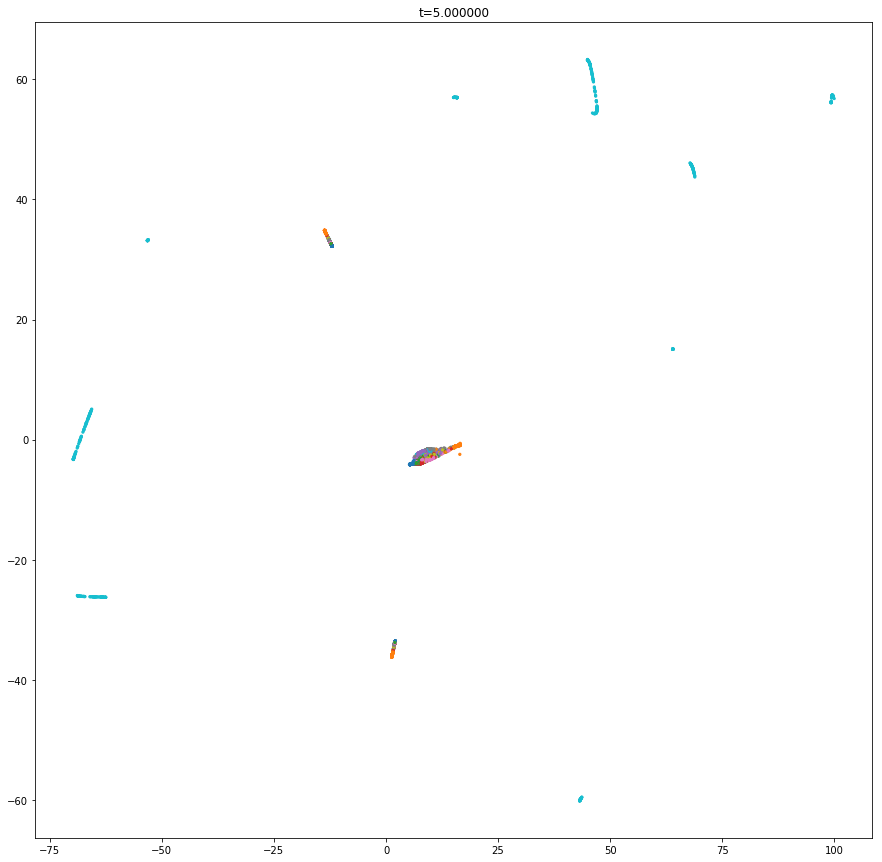

In [8]:
for t in Y:
    plot_embed(Y[t], labels_triple, 't=%3f' % t, figsize=(15, 15))
plt.show()

In [22]:
Y = {}
for t in [1.5, 2, 3, 5, 20]:
    trimap = TriMap(X, t=t)
    trimap.load_triplets('models/mnist2500.pkl')
    Y[t] = trimap.embed(num_iters=500, verbose=True)

RuntimeError: cuda runtime error (59) : device-side assert triggered at /pytorch/torch/lib/THC/generic/THCStorage.c:82

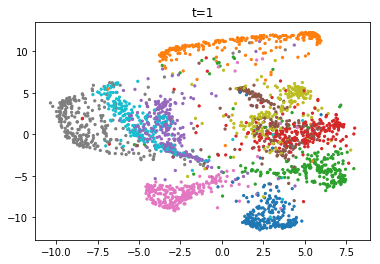

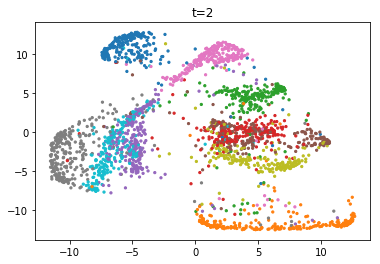

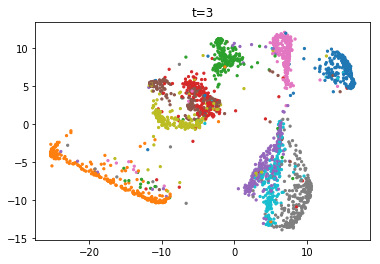

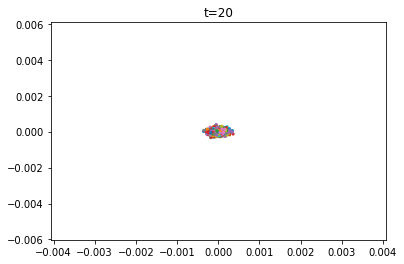

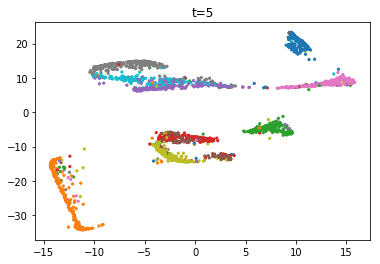

In [19]:
for t in Y:
    plot_embed(Y[t], labels, 't=%d' % t)
plt.show()

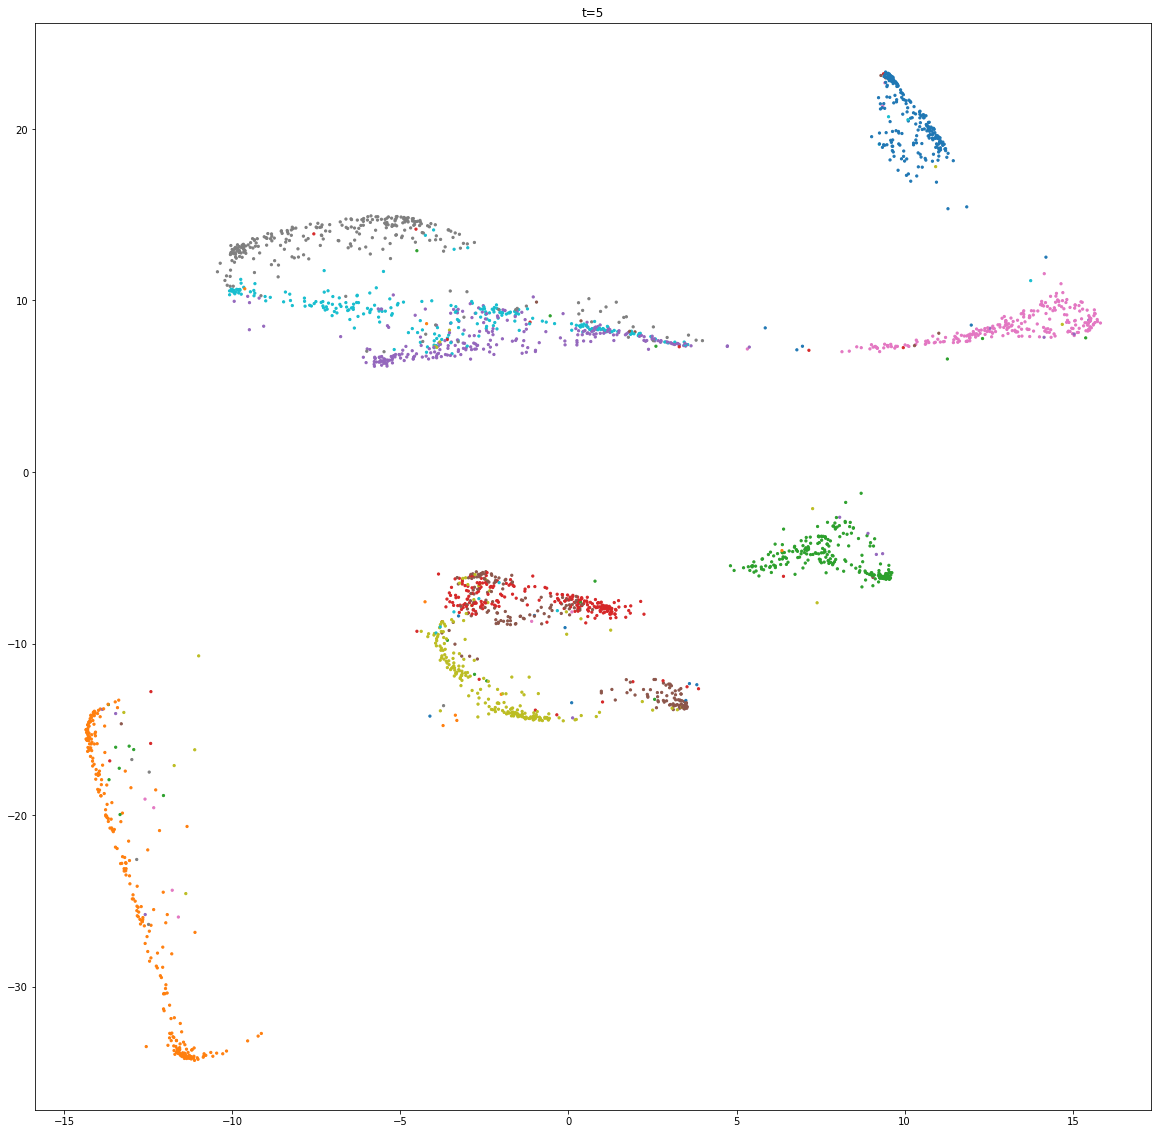

In [22]:
plot_embed(Y[5], labels, 't=5', figsize=(20, 20))
plt.show()